# ASSIGNMENT 2

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Data yang digunakan merupakan catatan setiap bangunan atau unit bangunan (apartmen, dll) yang terjual di pasar properti New York City selama 1 tahun periode.
Secara urutan Borough pada data menunjukkan 1-5 :Manhattan, Bronx, Brooklyn, Queens, dan Staten Island

### DATA CLEANING & FILTERING

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [6]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Terlihat dari hasil output diatas bahwa nilai null tidak terdeteksi pada dataframe tersebut, namun pada baris ke 2 kolom SALE PRICE terlihat bahwa terdapat missing values. Hal ini dikarenakan kolom SALE PRICE masih berbentuk datatype object (string). Maka kita harus mengubah kolom yang seharusnya memiliki datatype numeric (int/float) dengan function to_numeric

In [7]:
# Convert datatype to numeric
# Masukkan kolom-kolom yang ingin diubah kedalam list
numerik_variabel = ['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']

for i in numerik_variabel: 
    # coercing  kesalahan ke NA yang menempatkan kesalahan sebagai Nas
    df[i] = pd.to_numeric(df[i], errors='coerce') 

In [8]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   EASE-MENT                       84548 non-null  object 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

In [10]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [11]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Kolom YEAR BUILT menunjukkan bahwa kapan bangunan tersebut didirikan, dan terlihat bahwa dari data tersebut terdapat data yang memiliki nilai YEAR BUILT yaitu 0, sehingga hal ini dapat dianggap sebagai missing values dan selanjutnya kita hapus nilai YEAR BUILT yang memiliki nilai 0

In [12]:
yearbuild = df[df['YEAR BUILT']==0]
yearbuild.count()

BOROUGH                           6970
NEIGHBORHOOD                      6970
BUILDING CLASS CATEGORY           6970
TAX CLASS AT PRESENT              6970
BLOCK                             6970
LOT                               6970
EASE-MENT                         6970
BUILDING CLASS AT PRESENT         6970
ADDRESS                           6970
APARTMENT NUMBER                  6970
ZIP CODE                          6970
RESIDENTIAL UNITS                 6970
COMMERCIAL UNITS                  6970
TOTAL UNITS                       6970
LAND SQUARE FEET                  3967
GROSS SQUARE FEET                 2916
YEAR BUILT                        6970
TAX CLASS AT TIME OF SALE         6970
BUILDING CLASS AT TIME OF SALE    6970
SALE PRICE                        5391
SALE DATE                         6970
dtype: int64

In [13]:
# hapus baris dengan year_built = 0
df = df[df['YEAR BUILT']!=0]

Selanjutnya karna borough pada data mendefinisikan wilayahnya masing-masing seperti 1 : Manhattan, dan lainnya. Akan diubah code dari borough tersebut ke nama boroughnya agar mempermudah analisis

In [14]:
# Rename Borough
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'

df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'

df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'

df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'

df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1518809566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1518809566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1518809566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOR

In [15]:
df_group = df.groupby('BOROUGH')[['SALE PRICE']].sum()

In [16]:
df_group.sort_values(by='SALE PRICE', ascending=False)

,SALE PRICE
BOROUGH,
Manhattan,4.369265e+10
Brooklyn,1.807655e+10
Queens,1.289920e+10
Bronx,4.000894e+09
Staten Island,2.945297e+09


Dari hasil diatas terlihat bahwa borough yang memiliki total pendapatan paling tinggi terdapat pada wilayah Manhattan, dengan total pendapatan 50.246.190.000 dollar. 

In [17]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Variabel pada kolom LAND SQUARE FEET mendefinisikan luas tanah yang tercantum dalam meter persegi, sehingga nilai 0 pada kolom LAND SQUARE FEET menimbulkan ambiguitas karena tidak mungkin suatu properti memiliki luas tanah 0 m^2. Nilai 0 pada kolom tersebut dapat dianggap sebagai outlier dan kita akan menghapus outlier tersebut.

In [18]:
df[df['LAND SQUARE FEET']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17 00:00:00
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17 00:00:00
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01 00:00:00
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28 00:00:00
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25 00:00:00
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17 00:00:00
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06 00:00:00
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24 00:00:00


In [19]:
df = df[df['LAND SQUARE FEET']!=0]

Sama seperti dengan kolom LAND SQUARE FEET, GROSS SQUARE FEET mendefinisikan luas keseluruhan lantai yang diukur dari permukaan luar dinding. Sehingga tidak mungkin apabila GROSS SQUARE FEET memiliki nilai sebesar 0, selanjutnya kita akan menghapus nilai 0 pada kolom ini juga karna dapat terdeteksi sebagai outlier.

In [20]:
df[df['GROSS SQUARE FEET']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18767,Bronx,BAYCHESTER,06 TAX CLASS 1 - OTHER,1,4726,36,,G0,3550 EASTCHESTER ROAD,,...,0,0,0,3400.0,0.0,1955,1,G0,650000.0,2017-03-16 00:00:00
18909,Bronx,BEDFORD PARK/NORWOOD,05 TAX CLASS 1 VACANT LAND,2,3287,94,,D9,2681 MARION AVENUE,,...,100,0,100,28786.0,0.0,2016,1,V0,0.0,2016-11-10 00:00:00
18916,Bronx,BEDFORD PARK/NORWOOD,06 TAX CLASS 1 - OTHER,1,3290,18,,G0,N/A BAINBRIDGE AVENUE,,...,0,0,0,2597.0,0.0,1950,1,G0,0.0,2017-07-28 00:00:00
18917,Bronx,BEDFORD PARK/NORWOOD,06 TAX CLASS 1 - OTHER,1,3290,18,,G0,N/A BAINBRIDGE AVENUE,,...,0,0,0,2597.0,0.0,1950,1,G0,0.0,2017-06-30 00:00:00
19004,Bronx,BEDFORD PARK/NORWOOD,29 COMMERCIAL GARAGES,4,3287,90,,G7,2683 MARION AVENUE,,...,0,0,0,14121.0,0.0,1915,4,G7,0.0,2016-11-10 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48285,Brooklyn,WILLIAMSBURG-NORTH,03 THREE FAMILY DWELLINGS,1,2339,5,,C0,278 NORTH 6TH STREET,,...,3,0,3,2500.0,0.0,2016,1,C0,0.0,2017-08-16 00:00:00
48306,Brooklyn,WILLIAMSBURG-NORTH,07 RENTALS - WALKUP APARTMENTS,2B,2339,7,,C1,282 NORTH 6TH STREET,,...,10,0,10,2500.0,0.0,2016,2,C1,0.0,2017-08-16 00:00:00
48307,Brooklyn,WILLIAMSBURG-NORTH,07 RENTALS - WALKUP APARTMENTS,2A,2339,9,,C2,288 NORTH 6TH STREET,,...,5,0,5,3407.0,0.0,2016,2,C2,0.0,2017-08-16 00:00:00
48693,Brooklyn,WILLIAMSBURG-SOUTH,01 ONE FAMILY DWELLINGS,1,2428,34,,A5,5 WYTHE AVENUE,,...,1,0,1,1250.0,0.0,2015,1,A5,2269450.0,2016-09-30 00:00:00


In [21]:
df = df[df['GROSS SQUARE FEET']!=0]

In [22]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [23]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  23249
GROSS SQUARE FEET                 23558
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        12982
SALE DATE                             0
dtype: int64

Terlihat bahwa masih terdapat banyak missing values pada dataset tersebut, saya memutuskan untuk menghapus missing value yang ditemukan dari data tersebut.

In [24]:
df = df.dropna()

In [25]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [26]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [27]:
# Kolom Age dibutuhkan untuk mengetahui usia dari properti atau bangunan tersebut.
df['AGE'] = 2023 - df['YEAR BUILT']

# Mengkelompokkan properti/bangunan berdasarkan usianya, sebelum atau sesudah terjadinya perang
df['AGE STATS'] = np.where(df['AGE']>=76, 'PRE-WAR', 'POST-WAR')

df
     

C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1935229306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = 2023 - df['YEAR BUILT']
C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1935229306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE STATS'] = np.where(df['AGE']>=76, 'PRE-WAR', 'POST-WAR')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE STATS
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,123,PRE-WAR
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,110,PRE-WAR
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,123,PRE-WAR
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,103,PRE-WAR
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,103,PRE-WAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,25,POST-WAR
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,25,POST-WAR
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00,98,PRE-WAR
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,22,POST-WAR


Untuk mempermudah analisis kita akan mengubah nilai SALE PRICE menjadi dalam bentuk ribuan karna terlihat bahwa nilainya sangat besar kita akan membaginya dengan 1000.
Note : SALE PRICE dalam bentuk dollar ($)

In [28]:
df['SALE PRICE(000)'] = df['SALE PRICE'].astype(np.float64) / 1000

C:\Users\muham\AppData\Local\Temp\ipykernel_9984\1576087263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE(000)'] = df['SALE PRICE'].astype(np.float64) / 1000


In [29]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE STATS,SALE PRICE(000)
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,123,PRE-WAR,6625.000
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,110,PRE-WAR,3936.272
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,123,PRE-WAR,8000.000
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,103,PRE-WAR,3192.840
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,103,PRE-WAR,16232.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,25,POST-WAR,450.000
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,25,POST-WAR,550.000
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00,98,PRE-WAR,460.000
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,22,POST-WAR,11693.337


In [30]:
df[df['SALE PRICE']<100]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE STATS,SALE PRICE(000)
207,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1588.0,5653.0,1900,1,A4,10.0,2017-01-30 00:00:00,123,PRE-WAR,0.01
208,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1588.0,5653.0,1900,1,A4,10.0,2017-01-30 00:00:00,123,PRE-WAR,0.01
209,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1588.0,5653.0,1900,1,A4,10.0,2017-01-30 00:00:00,123,PRE-WAR,0.01
832,Manhattan,CHELSEA,14 RENTALS - 4-10 UNIT,2A,722,75,,S3,256 10TH AVENUE,,...,1146.0,3339.0,1910,2,S3,10.0,2017-01-27 00:00:00,113,PRE-WAR,0.01
1072,Manhattan,CHINATOWN,14 RENTALS - 4-10 UNIT,2B,199,1,,S5,79 BAXTER STREET,,...,2500.0,9835.0,1890,2,S5,10.0,2017-01-17 00:00:00,133,PRE-WAR,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84187,Staten Island,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,734,13,,A2,64 KELL AVENUE,,...,6000.0,864.0,1950,1,A2,10.0,2017-02-24 00:00:00,73,POST-WAR,0.01
84194,Staten Island,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,735,153,,A1,32 CARMEL AVENUE,,...,4000.0,1376.0,1925,1,A1,10.0,2017-05-12 00:00:00,98,PRE-WAR,0.01
84202,Staten Island,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,744,14,,A2,78 ARDMORE AVENUE,,...,4000.0,960.0,1950,1,A2,10.0,2017-07-27 00:00:00,73,POST-WAR,0.01
84301,Staten Island,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,749,14,,B2,84 CRAFTON AVENUE,,...,4200.0,1870.0,1920,1,B2,10.0,2017-02-24 00:00:00,103,PRE-WAR,0.01


Dari data tersebut banyak terdapat nilai SALE PRICE yang memiliki nilai 0 dari definisi data tersebut diketahui sebagai kasus pengalihan akta antar pihak : Misalnya, orang tua yang mengalihkan kepemilikan rumah kepada anaknya setelah pindah untuk pensiun. Oleh karena itu, saya akan memfilter data yang digunakan dengan properti yang terjual lebih dari 5000 dollar dan kurang dari 500 juta dollar

In [31]:
df = df[(df['SALE PRICE']>5000) & (df['SALE PRICE']<500000000)]

In [32]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE STATS,SALE PRICE(000)
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,123,PRE-WAR,6625.000
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,110,PRE-WAR,3936.272
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,123,PRE-WAR,8000.000
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,103,PRE-WAR,3192.840
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,103,PRE-WAR,16232.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,25,POST-WAR,450.000
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,25,POST-WAR,550.000
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00,98,PRE-WAR,460.000
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,22,POST-WAR,11693.337


In [33]:
sale_price = df['SALE PRICE(000)']

In [34]:
sale_price

0         6625.000
3         3936.272
4         8000.000
6         3192.840
9        16232.000
           ...    
84543      450.000
84544      550.000
84545      460.000
84546    11693.337
84547       69.300
Name: SALE PRICE(000), Length: 28439, dtype: float64

## MEASURE OF CENTRAL TENDENCY

In [35]:
import math 
import statistics
import numpy as np
import scipy.stats 
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['Solarize_Light2'])

### MEAN

In [36]:
# Nilai mean dari statistics
mean_stats = statistics.mean(sale_price)
mean_stats

1511.1023442455783

In [37]:
# Nilai mean dari numpy
mean_np = np.mean(sale_price)
mean_np

1511.1023442455744

In [38]:
# Nilai mean dari series
sale_price.mean()

1511.1023442455744

In [39]:
mean_total_borough = df['SALE PRICE'].groupby(df['BOROUGH']).mean()

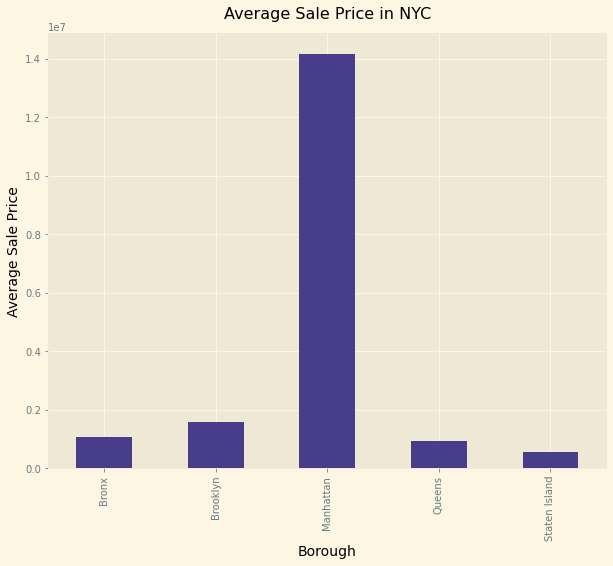

In [40]:
mean_total_borough.plot(kind='bar', figsize=(10,8), color='darkslateblue')
plt.title('Average Sale Price in NYC', y=1.02)
plt.xlabel('Borough', y=1.02, color='black', fontsize=14)
plt.ylabel('Average Sale Price', color='black', fontsize=14)
plt.show()

Dari hasil output rata-rata penjualan properti dari New York City didapat bahwa sebesar $ 1.511.102,35 dengan wilayah yang memiliki total rata-rata penjualan properti terbesar yaitu di wilayah Manhattan

### MEDIAN

In [41]:
# Nilai median dari statistics
median_stat = statistics.median(sale_price)
median_stat

635.0

In [42]:
# Nilai median dari numpy
median_np = np.median(sale_price)
median_np

635.0

In [43]:
# Nilai median dari series
sale_price.median()

635.0

Dari hasil output median dengan menggunakan packages statistics, numpy, dan function series diatas diperoleh median dari penjualan properti di New York sebesar $ 635.000

### MODE/MODUS

In [44]:
# Nilai mode/modus dari statistics
mode_stat = statistics.mode(sale_price)
mode_stat

700.0

In [45]:
# Nilai mode/modus dari scipy
mode_= scipy.stats.mode(sale_price)
print('Nilai Modusnya',mode_.mode)
print('Total Banyaknya Nilai Modus Muncul',mode_.count)

Nilai Modusnya [700.]
Total Banyaknya Nilai Modus Muncul [290]


In [46]:
# Nilai mode/modus dari series
sale_price.mode()

0    700.0
Name: SALE PRICE(000), dtype: float64

Hasil dari nilai modus diatas menunjukkan bahwa penjualan properti yang paling sering terjadi di New York City selama 1 tahun periode yaitu sebesar $ 700.000 dengan penjualan dengan harga tersebut terjadi sebanyak 290 kali.

## MEASURE OF SPREAD

### RANGE (MAX-MIN)

In [47]:
# Nilai Range dengan menggunakan numpy 
np.ptp(sale_price)

329994.3

In [48]:
# Nilai terbesar dari range dengan menggunakan numpy
np.amax(sale_price)

330000.0

In [49]:
# Nilai terkecil dari range dengan menggunakan numpy
np.amin(sale_price)

5.7

In [50]:
# Nilai range dari hasil pengurangan nilai terbesar dengan nilai terkecil
np.amax(sale_price)-np.amin(sale_price)

329994.3

Hasil output diatas menjelaskan bahwa rentang nilai penjualan properti dari yang terkecil ke terbesar yaitu sebesar 329.994.300, dengan nilai terkecil yaitu $ 5700, dan nilai terbesarnya 330.000.000 (dalam satuan dollar).

### VARIANCE

In [51]:
# Nilai Variance dengan menggunakan statistics
var_stat = statistics.variance(sale_price)
var_stat

48899500.86331457

In [52]:
# Nilai variance dengan menggunakan numpy
var_np = np.var(sale_price, ddof=1)
var_np

48899500.863314934

In [53]:
# Nilai variance dengan menggungakan series 
var_series = pd.Series(sale_price)
var_series.var()

48899500.863314934

Dari hasil output dengan menggunakan packages statistics, numpy, dan series function didapat hasil varians yang sangat besar dari data penjualan properti tersebut yaitu sebesar 48.899.500.

### STANDARD DEVIASI

In [54]:
# Nilai stdev dengan menggunakan statistics
std_stat = statistics.stdev(sale_price)
std_stat

6992.817805671371

In [55]:
# Nilai stdev dengan menggunakan numpy
std_np = np.std(sale_price, ddof=1)
std_np

6992.817805671397

In [56]:
# Nilai std dengan menggunakan series
std_series = pd.Series(sale_price)
std_series.std()

6992.817805671397

Dari Hasil output dengan menggunakan statistics, numpy, dan series function didapat hasil dari standard deviasi data tersebut sebesar 6.992,818

## PROBABILITY DISTRIBUTION

C:\Users\muham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


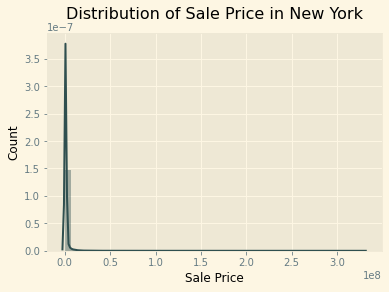

In [57]:
import seaborn as sns
sns.distplot(df['SALE PRICE'], color='darkslategrey')
plt.xlabel('Sale Price', fontsize=12, color='black')
plt.ylabel('Count',fontsize=12, color='black')
plt.title('Distribution of Sale Price in New York', y=1.04)
plt.show()

Terlihat dari distribusi plot dari data penjualan properti di New York diatas bahwa data sangat besar dan terlihat bahwa plot cendrung tidak normal dengan positive skewed, yang berarti nilai dari median>mean>modus nya.

C:\Users\muham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


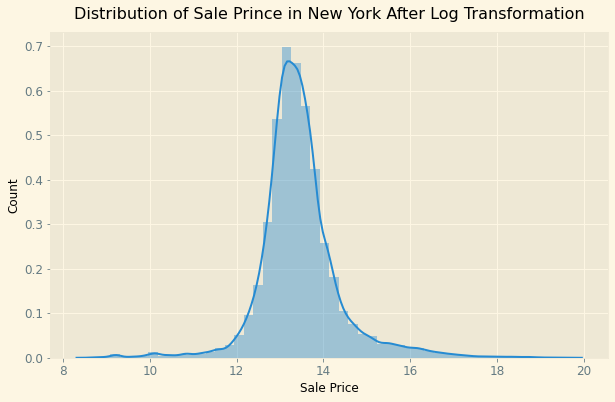

In [58]:
# Distribution plot with log transformation
plt.figure(figsize=(10,6))
sns.distplot(np.log(df['SALE PRICE'].values), kde=True)
plt.xlabel('Sale Price', fontsize = 12, color='black')
plt.ylabel('Count', fontsize = 12, color='black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Distribution of Sale Prince in New York After Log Transformation', y=1.02)
plt.show()

Berikut merupakan hasil dari distribution plot dengan sebelumnya dilakukan transformasi dengan metode logaritmik (log transformation) untuk membuat meminimalisir outlier dan membuat data menjadi lebih normal terlihat bahwa data sudah cendrung normal.

## CONFIDENCE INTERVAL

Selanjutnya akan dilakukan confidence interval pada kolom AGE untuk mengetahui interval data usia bangunan/properti pada data tersebut.

In [59]:
population_mean = df['AGE'].mean()
population_mean

82.3009599493653

In [60]:
population_std = df['AGE'].std()
population_std

30.516463699331442

**Pengambilan Sampel** 

In [61]:
n = 50 
sample_means =[]
for sample in range(0,1000):
    sample_values = df['AGE'].sample(n)
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)

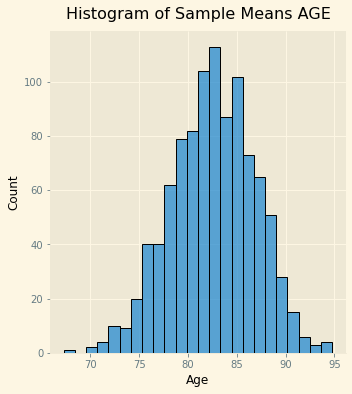

In [62]:
sns.displot(sample_means)
plt.title('Histogram of Sample Means AGE', y=1.02)
plt.xlabel('Age', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.show()

Terlihat dari grafik histogram diatas data sampel dari usia bangunan/properti data tersebut cenderung normal. 

In [63]:
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
mean_of_sample_means, median_of_sample_means

(82.56266000000001, 82.59)

In [64]:
standard_error = population_std/np.sqrt(n)
standard_error

4.315679683926076

In [65]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

4.284973433336548

Terlihat bahwa hasil dari standard error dengan standard eror sampel tidak jauh berbeda sehingga dapat dikatakan bahwa sampel memiliki karakteristik yang serupa dengan populasi.

In [66]:
z = 1.96

In [67]:
lower_bound = mean_of_sample_means - z * standard_error
lower_bound

74.1039278195049

In [68]:
upper_bound = mean_of_sample_means + z * standard_error
upper_bound

91.02139218049511

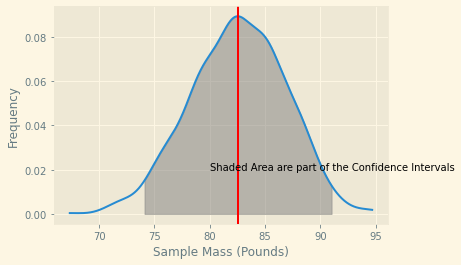

In [69]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),100000)
plt.plot(pos,kde(pos))
shade = np.linspace(lower_bound,upper_bound,300)
plt.fill_between(shade,kde(shade), color='grey', alpha=0.5)
plt.xlabel('Sample Mass (Pounds)')
plt.ylabel('Frequency')
plt.axvline(x=mean_of_sample_means, color='red')
plt.text(x=80, y=0.02, s='Shaded Area are part of the Confidence Intervals')
plt.show()

In [70]:
print('Confidence Interval Age dengan tingkat kepercayaan sebesar 95% yaitu')
print('interval',lower_bound,'-', upper_bound)

Confidence Interval Age dengan tingkat kepercayaan sebesar 95% yaitu
interval 74.1039278195049 - 91.02139218049511


Dari hasil confidence interval usia bangunan/properti dari data didapat interval usia dari bangunan/properti sebesar 74 tahun hingga 91 tahun.

## HYPOTHESIS

**Dengan tingkat kepercayaan sebesar 95%**

**Hipotesis**:

**$H0$** : Rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) tidak lebih besar dari penjualan setelah masa perang (Post-War)

**$H1$** : Rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) lebih besar dari penjualan setelah masa perang (Post-War)

**$Alpha : 0.05$**

In [71]:
pre = df[df['AGE STATS']=='PRE-WAR']
post = df[df['AGE STATS']=='POST-WAR']

In [72]:
# Jumlah data, mean, dan standard deviasi
n_pre = len(pre)
mean_pre = pre['SALE PRICE(000)'].mean()
std_pre = pre['SALE PRICE(000)'].std()
print(n_pre,mean_pre,std_pre)

18635 1613.2205960826402 6836.1127421139945


In [73]:
# Jumlah data, mean, dan standard deviasi
n_post = len(post)
mean_post = post['SALE PRICE(000)'].mean()
std_post = post['SALE PRICE(000)'].std()
print(n_post,mean_post,std_post)

9804 1317.000587515301 7277.79099295987


In [74]:
post

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE STATS,SALE PRICE(000)
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,,...,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17 00:00:00,14,POST-WAR,10350.000
234,Manhattan,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2B,695,6,,D6,559 WEST 23RD STREET,,...,2469.0,19892.0,2014,2,D6,4600000.0,2016-11-29 00:00:00,9,POST-WAR,4600.000
239,Manhattan,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2,794,11,,D7,155 WEST 18TH,,...,10053.0,78882.0,2014,2,D7,2341975.0,2016-10-28 00:00:00,9,POST-WAR,2341.975
929,Manhattan,CHELSEA,21 OFFICE BUILDINGS,4,790,32,,O1,531-537 AVENUE OF THE AMER,,...,6468.0,14056.0,1953,4,O1,42400000.0,2017-04-18 00:00:00,70,POST-WAR,42400.000
937,Manhattan,CHELSEA,22 STORE BUILDINGS,4,696,28,,K1,507 WEST 24TH,,...,3950.0,7900.0,2013,4,K1,10750000.0,2016-12-28 00:00:00,10,POST-WAR,10750.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07 00:00:00,29,POST-WAR,648.000
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,25,POST-WAR,450.000
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,25,POST-WAR,550.000
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,22,POST-WAR,11693.337


In [75]:
import statsmodels.api as sm

In [76]:
# Dengan tingkat kepercayaan sebesar 95% maka alpha = 0.05
alpha = 0.05

In [77]:
price_hypo = sm.stats.ztest(pre['SALE PRICE(000)'].dropna(),
                            post['SALE PRICE(000)'].dropna(), alternative='two-sided')

In [78]:
price_hypo

(3.3958755928809983, 0.0006840944507895855)

In [79]:
if price_hypo[1]>alpha:
    print('Terima Hipotesis nol(H0) Rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) tidak lebih besar dari penjualan setelah masa perang (Post-War)')
else:
    print('Reject Hipotesis nol(H0) Rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) lebih besar dari penjualan setelah masa perang (Post-War)')

Reject Hipotesis nol(H0) Rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) lebih besar dari penjualan setelah masa perang (Post-War)


Dari hasil uji hipotesis diatas didapat bahwa tolak H0 yang mana artinya terima hipotesis alternatif (H1) yaitu rata-rata penjualan bangunan/properti sebelum masa perang (Pre-War) lebih besar dari penjualan setelah masa perang (Post-War).

**KESIMPULAN :**

Dari hasil analisis data penjualan properti/bangunan di New York selama 1 tahun periode, dapat diambil kesimpulan bahwa total rata-rata penjualan bangunan terbesar terjadi di wilayah Manhattan dengan total rata-rata penjualan properti sebesar $ 1.511.102,35. Didapat juga bahwa bangunan yang telah berdiri sebelum jaman perang (Pre-War) memiliki rata-rata penjualan yang lebih besar dibanding dengan bangunan/properti yang baru dibangun atau dibangun setelah masa peperangan usai (Post-War).